In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline


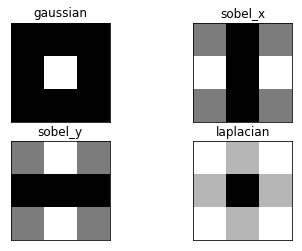

In [25]:
gaussian = (1/9) * np.ones((3, 3))
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])
laplacian = np.array([[0, 1, 0],
                      [1, -4, 1],
                      [0, 1, 0]])
filters = [gaussian, sobel_x, sobel_y, laplacian]
filter_name = ['gaussian', 'sobel_x', 'sobel_y', 'laplacian']

f_filters = [np.fft.fft2(x) for x in filters]
fshift = [np.fft.fftshift(y) for y in f_filters]
frequency_tx = [np.log(np.abs(z) + 1) for z in fshift]

for i in range(len(filters)):
    plt.subplot(2, 2, i+1)
    plt.imshow(frequency_tx[i], cmap='gray')
    plt.title(filter_name[i])
    plt.xticks([])
    plt.yticks([])
plt.show()


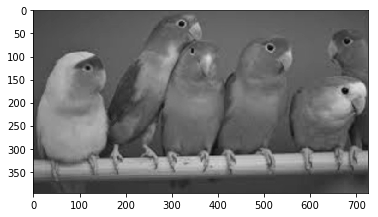

In [19]:
image = cv2.imread('../data/1_2/images/birds.jpg')
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
norm_image = image_copy / 255.0
plt.imshow(image_copy, cmap='gray')

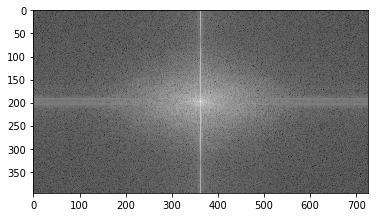

In [21]:
def fourier_transform(norm_image):
    f = np.fft.fft2(norm_image)
    f = np.fft.fftshift(f)
    frequency_tx = 20 * np.log(np.abs(f))
    return frequency_tx

f_image = fourier_transform(norm_image)

plt.imshow(f_image, cmap='gray')

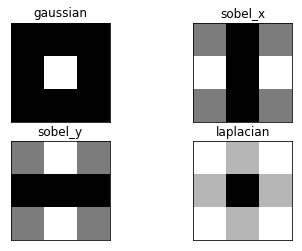

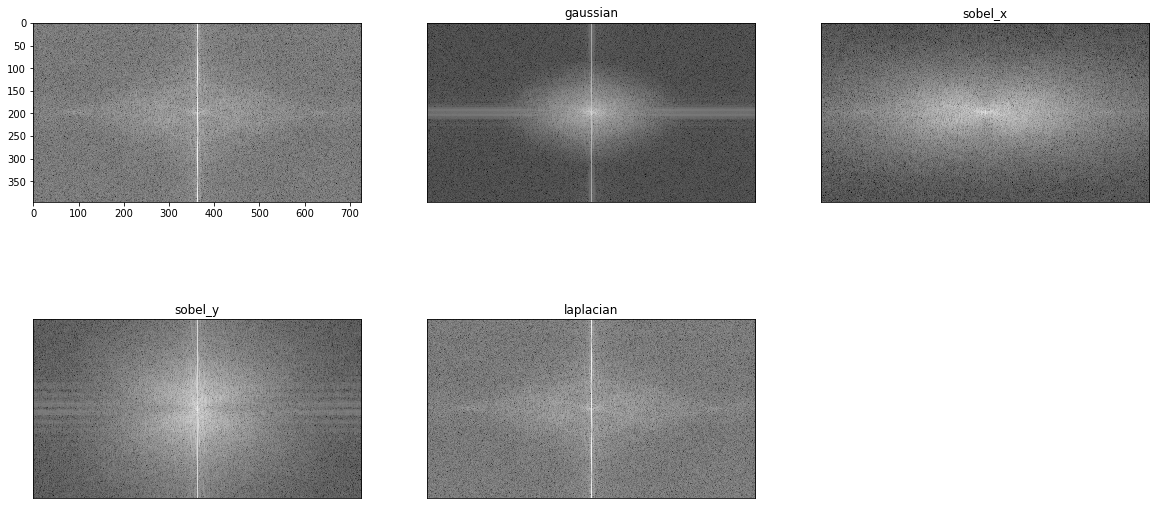

In [28]:
for i in range(len(filters)):
    plt.subplot(2, 2, i+1)
    plt.imshow(frequency_tx[i], cmap='gray')
    plt.title(filter_name[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(231)
plt.imshow(f_image, cmap='gray')

for i in range(len(filters)):
    filtered_image = cv2.filter2D(image_copy, -1, filters[i])
    f_image = fourier_transform(filtered_image)
    plt.subplot(2, 3, i+2)
    plt.title(filter_name[i])
    plt.imshow(f_image, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    